In [90]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn import preprocessing


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_raw=pd.read_csv('data.csv')
df_raw.head()

,Indv_ID,Median Number of Roots,Maximum Number of Roots,Number of Root Tips,Total Root Length,Depth,Maximum Width,Width-to-Depth Ratio,Network Area,Convex Area,...,Holes,Average Hole Size,Computation Time,Average Root Orientation,Shallow Angle Frequency,Medium Angle Frequency,Steep Angle Frequency,Fine Diameter Frequency,Medium Diameter Frequency,Coarse Diameter Frequency
0,160_271_1,1.333333,7.666667,72.000000,6027.346667,1942.666667,642.333333,0.337494,114327.6667,6.081240e+05,...,15.666667,1061.477667,0.149667,58.222633,0.184488,0.236488,0.579024,0.118654,0.274584,0.606762
1,160_271_2,1.666667,8.666667,89.666667,6124.556667,1498.666667,413.333333,0.271225,107012.3333,4.023363e+05,...,21.666667,813.093333,0.120333,57.090933,0.235690,0.182359,0.581951,0.140089,0.300210,0.559701
2,160_271_5,3.000000,13.500000,156.500000,10633.905000,1523.000000,866.500000,0.564773,110906.5000,8.282115e+05,...,72.000000,2237.943000,0.162500,53.098600,0.241076,0.293106,0.465817,0.197978,0.325394,0.476629
3,160_271_7,3.000000,11.666667,197.666667,15029.363330,2025.000000,1035.666667,0.544554,168416.3333,1.075985e+06,...,93.666667,765.552333,0.212667,55.718767,0.201371,0.264966,0.533662,0.188319,0.259664,0.552017
4,160_271_11,3.000000,16.333333,213.666667,14978.976670,1663.333333,1198.666667,0.755671,146661.3333,1.191514e+06,...,90.000000,1417.320667,0.217000,51.004833,0.245865,0.326259,0.427876,0.206260,0.301020,0.492721


In [3]:
df_raw.shape

(174, 28)

In [4]:
df_raw.describe()

,Median Number of Roots,Maximum Number of Roots,Number of Root Tips,Total Root Length,Depth,Maximum Width,Width-to-Depth Ratio,Network Area,Convex Area,Solidity,...,Holes,Average Hole Size,Computation Time,Average Root Orientation,Shallow Angle Frequency,Medium Angle Frequency,Steep Angle Frequency,Fine Diameter Frequency,Medium Diameter Frequency,Coarse Diameter Frequency
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000,...,174.000000,151.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,2.281609,10.885057,130.676245,11127.071255,1690.042146,789.669540,0.477628,161995.435824,8.383288e+05,0.241496,...,59.298851,1615.520294,0.192511,54.022532,0.232827,0.261236,0.504022,0.114752,0.249439,0.633893
std,1.123066,4.748918,89.213720,7247.178113,427.377518,256.108711,0.130000,64609.511640,4.140984e+05,0.093152,...,68.884462,1570.988151,0.057116,4.014936,0.044866,0.043543,0.071253,0.052136,0.070462,0.116866
min,1.000000,3.000000,23.500000,1618.603333,727.000000,239.333333,0.233910,63473.333330,1.209318e+05,0.099182,...,0.333333,55.400000,0.087000,32.820667,0.125164,0.158050,0.276917,0.019757,0.071812,0.414036
25%,1.333333,7.000000,57.333333,5332.420000,1349.750000,604.416667,0.383376,114985.916700,5.267538e+05,0.173043,...,10.541667,758.414500,0.146000,51.819425,0.203927,0.236423,0.463782,0.071556,0.200131,0.536811
50%,2.000000,10.583333,114.666667,9628.600000,1661.666667,786.166667,0.450117,146828.666650,7.757760e+05,0.218855,...,38.000000,1091.754333,0.194167,54.410700,0.231704,0.259526,0.507975,0.118716,0.259080,0.621522
75%,3.000000,14.000000,178.000000,15145.115833,2038.500000,965.916667,0.569814,198243.750025,1.158902e+06,0.278568,...,79.250000,1942.940000,0.232833,56.349633,0.256252,0.289202,0.544091,0.150162,0.307660,0.726825
max,6.666667,26.666667,436.666667,41320.866670,2544.000000,1631.000000,0.957264,435357.333300,2.120000e+06,0.561502,...,405.666667,11418.500000,0.407667,64.810000,0.397963,0.430041,0.693528,0.242243,0.383006,0.897199


In [5]:
df_raw.isnull().sum()

Indv_ID                       0
Median Number of Roots        0
Maximum Number of Roots       0
Number of Root Tips           0
Total Root Length             0
Depth                         0
Maximum Width                 0
Width-to-Depth Ratio          0
Network Area                  0
Convex Area                   0
Solidity                      0
Lower Root Area               0
Average Diameter              0
Median Diameter               0
Maximum Diameter              0
Perimeter                     0
Volume                        0
Surface Area                  0
Holes                         0
Average Hole Size            23
Computation Time              0
Average Root Orientation      0
Shallow Angle Frequency       0
Medium Angle Frequency        0
Steep Angle Frequency         0
Fine Diameter Frequency       0
Medium Diameter Frequency     0
Coarse Diameter Frequency     0
dtype: int64

In [ ]:
# pip install --upgrade pandas


In [17]:
idx=np.where(df_raw['Average Hole Size'].isnull())[0]


array([ 13,  15,  18,  27,  39,  48,  49,  51,  53,  69,  75,  76,  81,
       105, 120, 127, 134, 138, 153, 163, 166, 168, 172])

In [25]:
df_raw.iloc[list(idx)]

,Indv_ID,Median Number of Roots,Maximum Number of Roots,Number of Root Tips,Total Root Length,Depth,Maximum Width,Width-to-Depth Ratio,Network Area,Convex Area,...,Holes,Average Hole Size,Computation Time,Average Root Orientation,Shallow Angle Frequency,Medium Angle Frequency,Steep Angle Frequency,Fine Diameter Frequency,Medium Diameter Frequency,Coarse Diameter Frequency
13,160_271_22,1.000000,4.333333,31.333333,2801.856667,1187.333333,369.666667,0.310645,94568.33333,271066.3333,...,3.000000,NaN,0.105667,58.024967,0.246252,0.162517,0.591231,0.044606,0.120100,0.835294
15,160_271_26,1.000000,5.000000,28.000000,3209.116667,1184.000000,424.333333,0.357626,104926.66670,307826.3333,...,3.000000,NaN,0.101667,54.815500,0.252783,0.209150,0.538067,0.063366,0.170170,0.766464
18,160_271_29,2.333333,10.333333,102.000000,9543.960000,1532.666667,904.000000,0.566096,159835.33330,810517.3333,...,47.000000,NaN,0.177000,55.777900,0.216252,0.237055,0.546694,0.065394,0.172907,0.761700
27,160_271_48,1.000000,6.666667,42.666667,4799.220000,1381.333333,772.000000,0.560044,140461.00000,580283.3333,...,2.666667,NaN,0.138333,51.251067,0.245788,0.321384,0.432827,0.049624,0.203218,0.747158
39,160_271_65,1.000000,5.000000,63.000000,4201.980000,1154.500000,488.000000,0.405536,107884.00000,353888.5000,...,7.000000,NaN,0.127500,51.521100,0.289492,0.252613,0.457894,0.083825,0.175518,0.740656
48,160_271_118,2.500000,8.500000,140.000000,11052.360000,1476.000000,961.500000,0.555918,169751.00000,876301.5000,...,52.000000,NaN,0.222500,50.856850,0.265975,0.289590,0.444435,0.106863,0.142097,0.751040
49,160_271_119,1.666667,16.000000,228.666667,21019.620000,2126.000000,679.333333,0.333233,227286.33330,984548.3333,...,204.666667,NaN,0.234333,52.053767,0.248723,0.285409,0.465868,0.132102,0.266936,0.600962
51,160_271_122,1.000000,5.666667,27.666667,3090.596667,1174.666667,439.000000,0.344114,105528.33330,317666.3333,...,6.666667,NaN,0.124667,54.821833,0.246437,0.258030,0.495532,0.051123,0.095131,0.853746
53,160_271_126,3.333333,12.666667,151.000000,13060.123330,1313.333333,744.666667,0.569873,152407.00000,597703.0000,...,121.000000,NaN,0.167667,50.002300,0.292655,0.271569,0.435776,0.129421,0.285027,0.585553
69,160_271_149,1.333333,4.333333,58.000000,4786.403333,1382.333333,433.333333,0.355431,91769.00000,325484.6667,...,18.333333,NaN,0.132000,55.445967,0.231171,0.241316,0.527512,0.090706,0.185877,0.723417


In [88]:
corr=df_raw.corr()

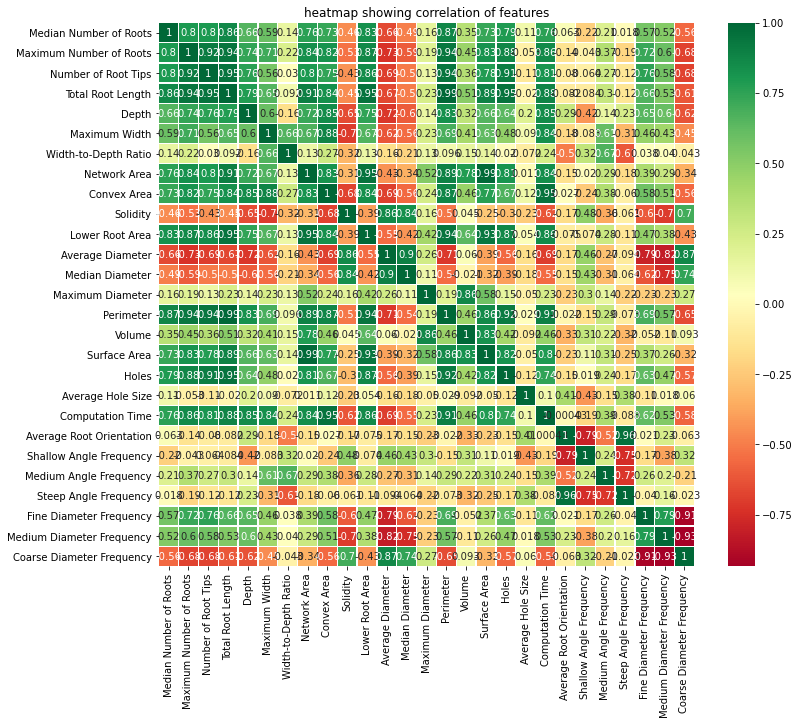

In [95]:
plt.figure(figsize=(12,10))

sns.heatmap(corr,cmap='RdYlGn',linewidths=0.30,annot=True)
plt.title('heatmap showing correlation of features')
plt.show()

In [26]:
df_copy = df_raw.copy()

In [27]:
df_copy.dropna(inplace=True)

In [28]:
df_copy.shape

(151, 28)

In [29]:
scaled_data = preprocessing.scale(df_copy)

In [36]:
scaled_data[:,0].var()

1.0

In [41]:
pca = PCA()

In [42]:
pca.fit(scaled_data)

PCA()

In [43]:
pca_data = pca.transform(scaled_data)

In [44]:
## calculate the percentage of variation that each principal component accout for

In [45]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

In [47]:
# lables for scree plot
# one label for each principal compenent

labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]

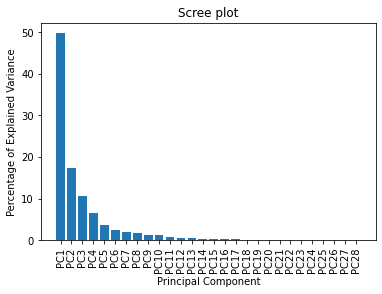

In [78]:
plt.bar(range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation=90)
plt.title('Scree plot')

plt.show()

In [51]:
# almost 50% variance is along the first principal compoenent
# 20% is along second principal component
# 10 % is along third principal compenent

In [52]:
pca_df = pd.DataFrame(pca_data,columns=labels)
# rows have sample labels and columns have pc labels

In [53]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-2.197371,-2.498501,-0.428407,0.189164,2.356937,-0.272143,0.356666,-0.585542,0.831028,0.062531,...,0.143918,0.327263,0.087048,-0.052045,0.023876,0.086348,-0.020127,0.010721,-0.003951,5.962847e-08
1,-3.227309,-2.203307,-0.888106,-2.150328,2.642277,0.854712,0.443888,-0.337223,-0.230873,0.259752,...,0.037959,-0.101194,-0.045539,0.011215,0.027795,0.094910,-0.034368,-0.078947,-0.017690,1.009581e-06
2,0.499997,-1.945623,2.997362,-0.328832,1.561270,1.616304,0.806734,-0.489562,-0.090144,-0.214742,...,0.006853,-0.203470,-0.087954,-0.054656,-0.101548,0.051908,0.080072,0.027161,-0.002915,3.585277e-06
3,1.976080,-1.599921,0.923497,0.140885,1.295646,0.150373,1.707349,-0.416231,0.552339,0.496924,...,0.052517,0.148985,0.040756,-0.203474,0.025478,-0.016024,-0.077003,-0.027772,0.004267,-1.354506e-06
4,2.669729,-0.551108,3.901483,0.428817,0.725475,0.932578,1.589663,-0.367394,-0.139257,0.032746,...,-0.070525,-0.086333,0.107498,-0.010813,-0.107772,-0.011079,0.011954,0.027539,0.006090,-1.906209e-06


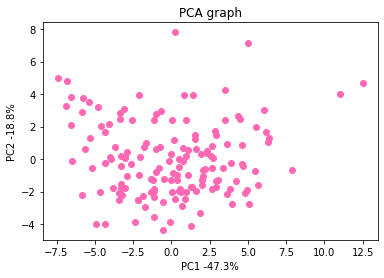

In [57]:
plt.scatter(pca_df.PC1,pca_df.PC2,color = 'hotpink')
plt.title('PCA graph')
plt.xlabel('PC1 -{}%'.format(per_var[0]))
plt.ylabel('PC2 -{}%'.format(per_var[1]))


plt.show()

In [58]:
from mpl_toolkits.mplot3d import Axes3D


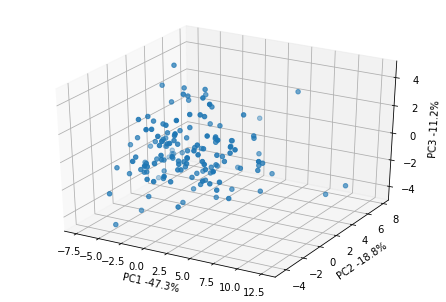

In [64]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3)



ax.set_xlabel('PC1 -{}%'.format(per_var[0]))
ax.set_ylabel('PC2 -{}%'.format(per_var[1]))
ax.set_zlabel('PC3 -{}%'.format(per_var[2]))

plt.show()



### FILLING THE MISSING VALUES

In [65]:
df_copy2 = df_raw.copy()

In [68]:
df_copy2['Average Hole Size'].fillna(df_copy2['Average Hole Size'].mean(), inplace=True)

In [70]:
# scaling the value to have mean 0 and std of 1

In [69]:
scaled_data = preprocessing.scale(df_copy2)

In [74]:
## applying the PCA

In [71]:
pca = PCA()

In [72]:
pca.fit(scaled_data)

PCA()

In [73]:
pca_data = pca.transform(scaled_data)

In [76]:
# calculate the percentage of variance explained

In [81]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

In [82]:
## for scree plot

In [83]:
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]

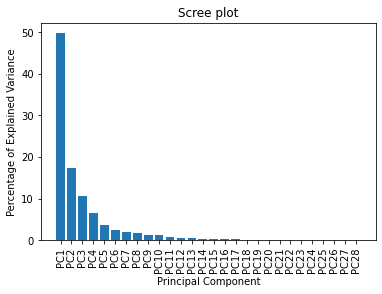

In [84]:
plt.bar(range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation=90)
plt.title('Scree plot')

plt.show()

In [86]:
pca_df = pd.DataFrame(pca_data,columns=labels)

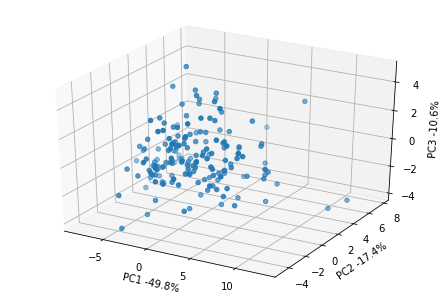

In [87]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3)



ax.set_xlabel('PC1 -{}%'.format(per_var[0]))
ax.set_ylabel('PC2 -{}%'.format(per_var[1]))
ax.set_zlabel('PC3 -{}%'.format(per_var[2]))

plt.show()

